## Model 1

In [1]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]

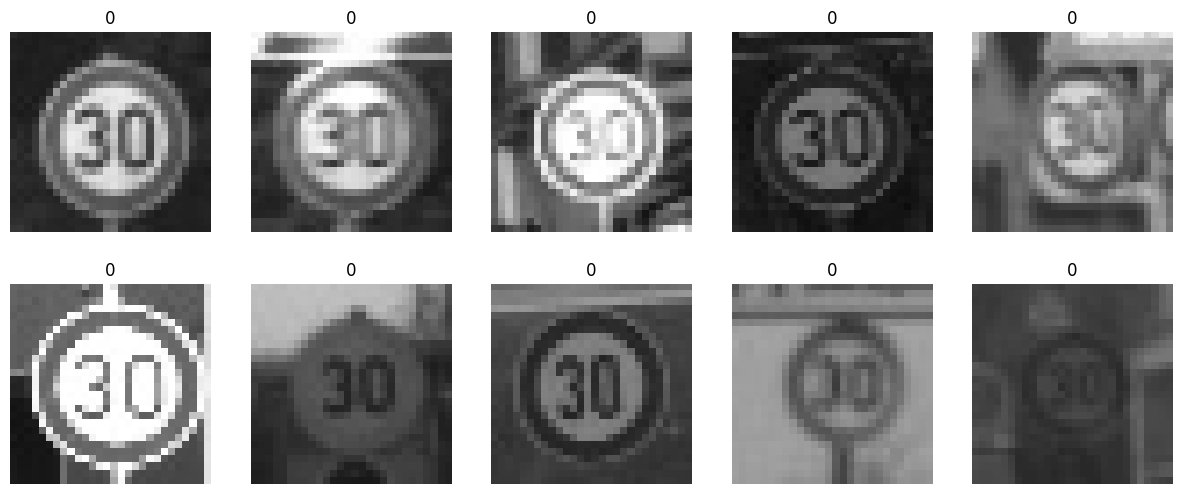

In [2]:
folder = 'subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

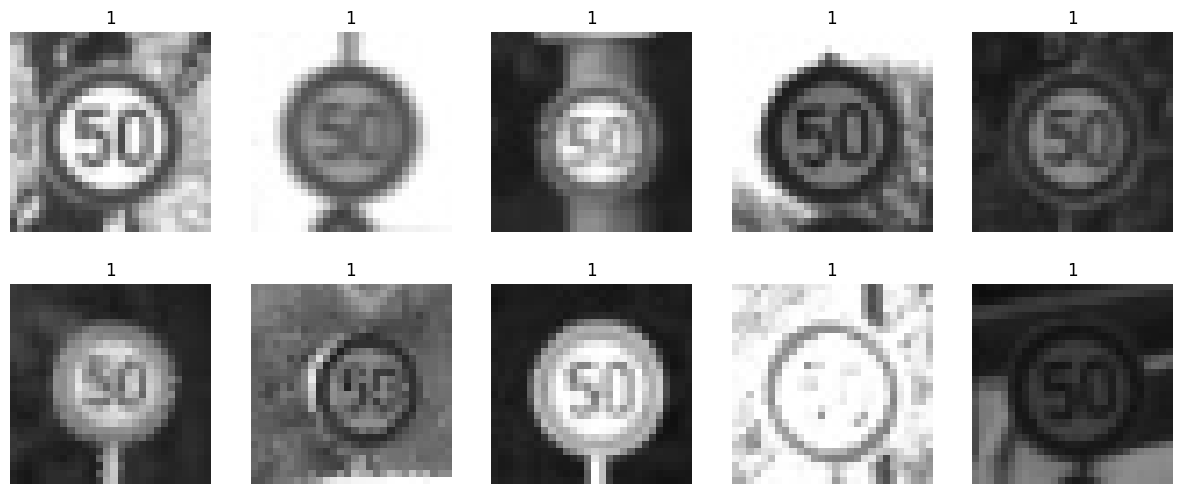

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
from time import time

start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.017930030822753906


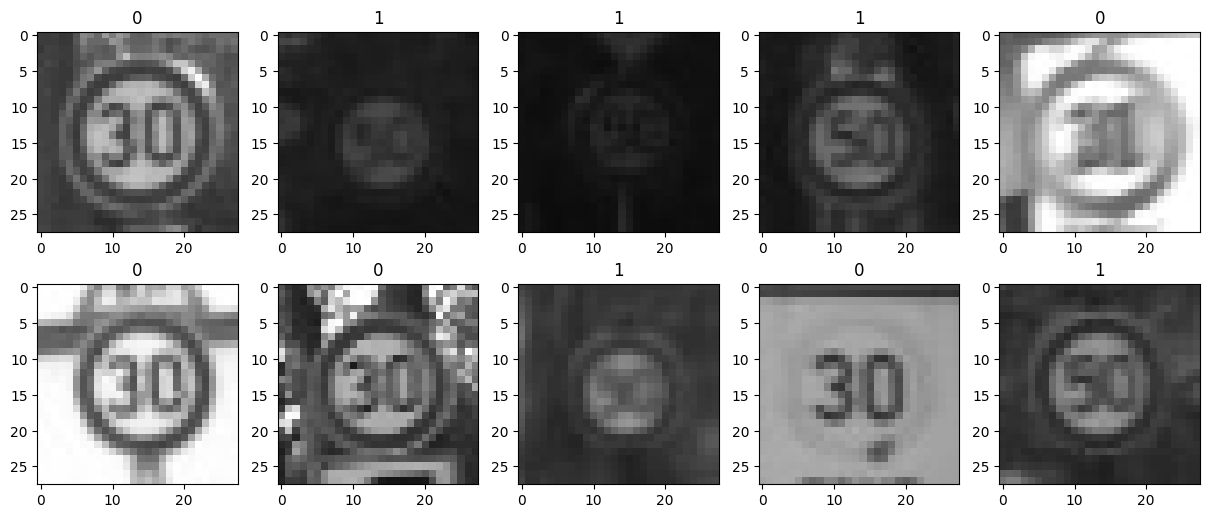

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [8]:
inputs = Input(shape=([pixels.shape[1]]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


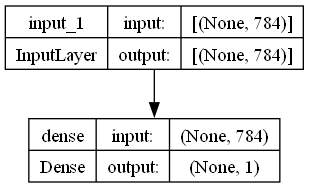

In [9]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [11]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 1s 1ms/step - loss: 0.3055
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1539
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1252
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1142
Epoch 8/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1005


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

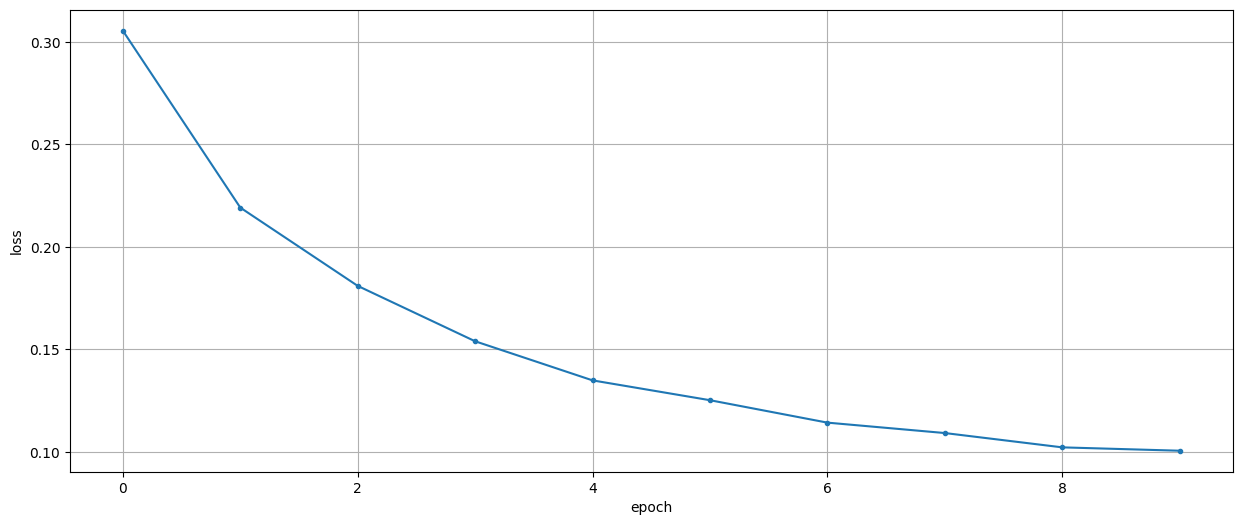

In [12]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [13]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 59ms/step
[[0.09274042]] 0


In [14]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 911us/step


In [15]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9263982102908277


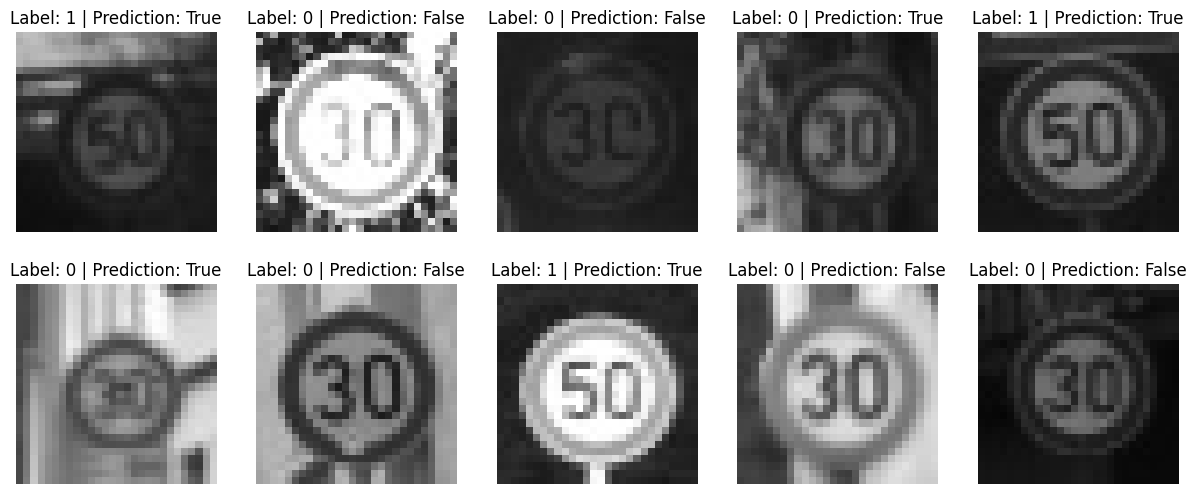

In [16]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

## New model 

In [17]:
inputs = Input(shape=(pixels.shape[1],)) 
dense1 = Dense(64, activation="relu")(inputs)  
dense2 = Dense(32, activation="relu")(dense1) 
outputs = Dense(1, activation="sigmoid")(dense2)  

model = Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52353 (204.50 KB)
Trainable params: 52353 (204.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


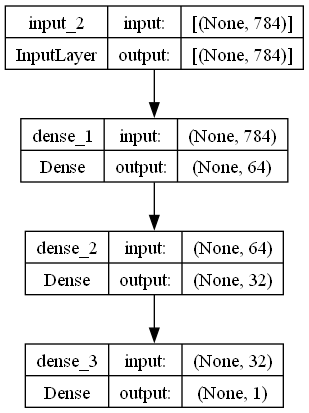

In [18]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(pixels, labels, epochs=20, batch_size=64)

predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5  

correct = np.sum(predictions == labels)  
accuracy = correct / len(labels)  
print('Accuracy:', accuracy)

Epoch 1/20
70/70 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.6114
Epoch 2/20
70/70 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7188
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8174
Epoch 4/20
70/70 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8519
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9054
Epoch 6/20
70/70 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9168
Epoch 7/20
70/70 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9345
Epoch 8/20
70/70 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9302
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9403
Epoch 10/20
70/70 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9470
Epoch 11/20
70/70 [

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

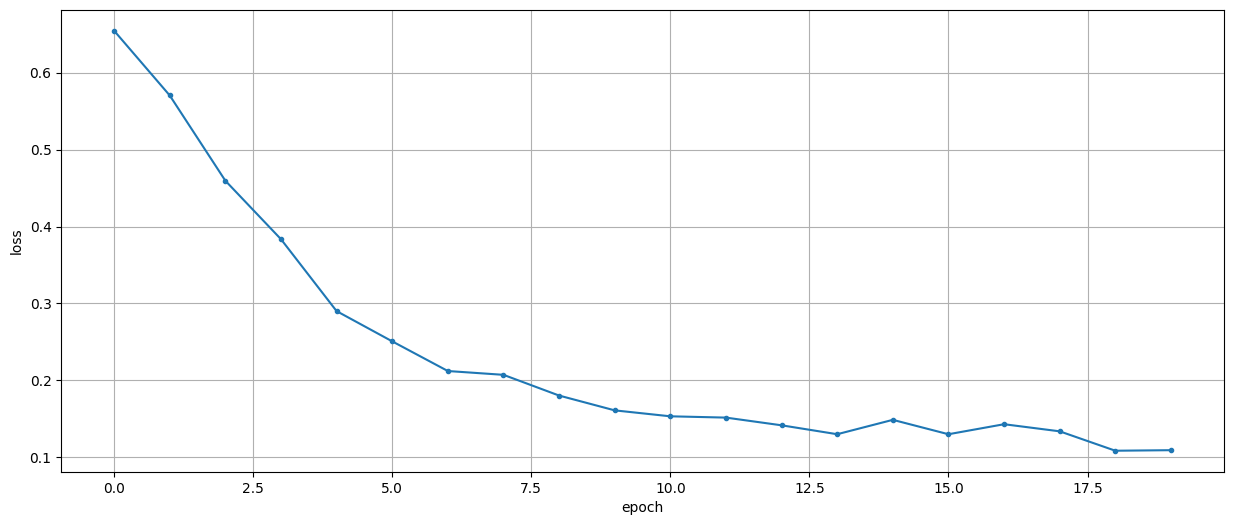

In [20]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')